In [1]:
import sys
sys.path.append('./')
from ML_toolbox import *

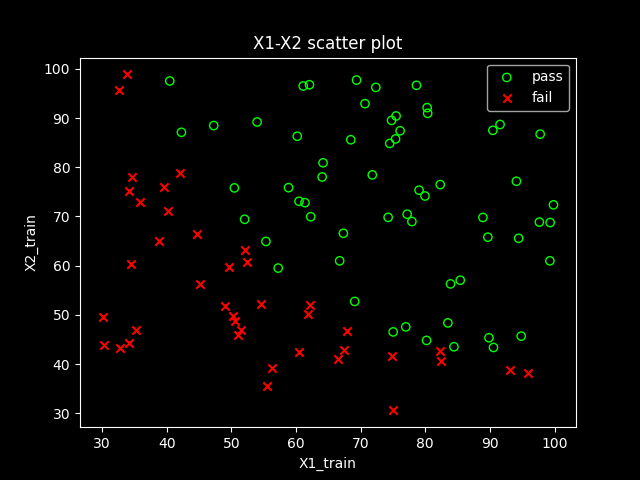

Iteration #0: cost=0.31	w=[0.07 0.06]	b=-8.00, 
Iteration #1000: cost=0.31	w=[0.06993181 0.06348754]	b=-8.02, 
Iteration #2000: cost=0.30	w=[0.07008127 0.06363926]	b=-8.04, 
Iteration #3000: cost=0.30	w=[0.07023026 0.06379048]	b=-8.06, 
Iteration #4000: cost=0.30	w=[0.07037877 0.06394122]	b=-8.08, 
Iteration #5000: cost=0.30	w=[0.07052682 0.06409147]	b=-8.10, 
Iteration #6000: cost=0.30	w=[0.0706744  0.06424124]	b=-8.11, 
Iteration #7000: cost=0.30	w=[0.07082153 0.06439054]	b=-8.13, 
Iteration #8000: cost=0.30	w=[0.07096819 0.06453935]	b=-8.15, 
Iteration #9000: cost=0.30	w=[0.0711144 0.0646877]	b=-8.17, 
Iteration #10000: cost=0.30	w=[0.07126015 0.06483558]	b=-8.19, 
Optimal parameters: Iteration 10000, cost: 0.30185229295469806, optimal w: [0.07126015 0.06483558], optimal b: -8.18946883093604
Model accuracy: 92.0


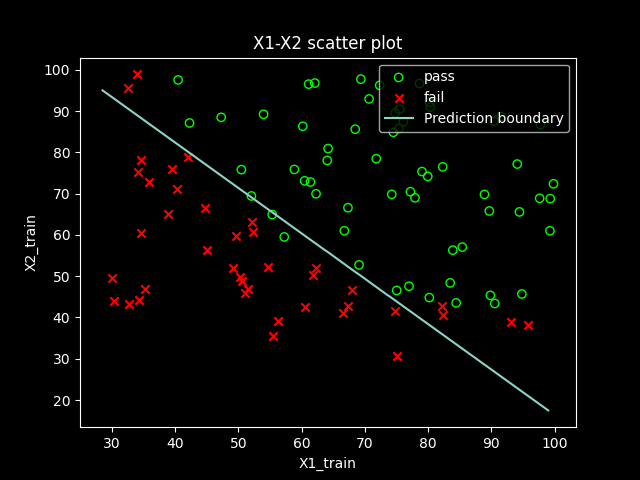

In [3]:
## Logestic Reg 1: Two features, binary classification, linear boundary
##--------------------------------------------------------------------
# Read and plot training data
X_train, Y_train = read_data('./data/logestic_regression_data.txt', feature_count=2)
plot_binary_classification_data(X_train, Y_train)

# Find optimal w and b using Gradient Descent
initial_w = np.array([0.07, 0.06])
initial_b = -8.
optimal_w, optimal_b, _ = gradient_descent(X_train, Y_train, initial_w, initial_b, alpha= 0.001, iteration_count=10000)

# Calculate accuracy of the model
Y_hat = prediction_function(X_train, optimal_w, optimal_b, activation=sigmoid)
accuracy = model_accuracy(Y_train, Y_hat)
print(f'Model accuracy: {accuracy}')

# Plot the prediction boundary line
# All X1, X2 pairs when P=0.5
X1 = np.arange(0,100,0.5)
X2 = np.arange(0,100,0.5)
X_meshed = np.array(np.meshgrid(X1, X2)).T.reshape(-1, 2)

Y_hat = prediction_function(X_meshed, optimal_w, optimal_b, activation=sigmoid)
X_divide = X_meshed[np.around(Y_hat, decimals=3) == 0.5]

plot_binary_classification_data(X_train, Y_train, boundary=X_divide)

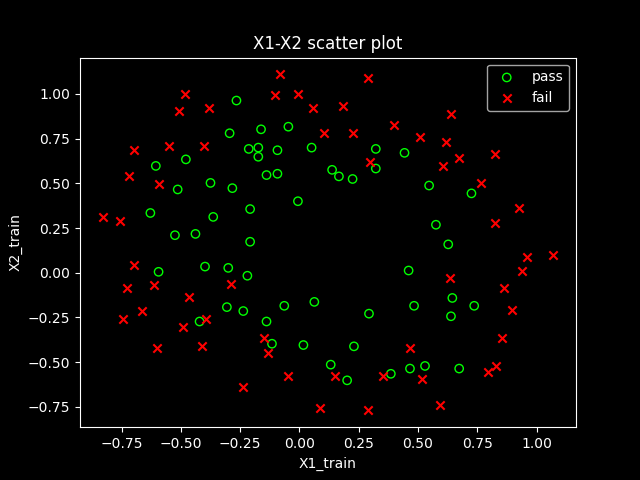

(118, 27)
Iteration #0: cost=3.93	w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]	b=-8.00, 
Iteration #10000: cost=0.48	w=[ 0.49640467  1.24102116 -1.31792205 -0.86166062 -0.31001184  0.05826332
 -0.44521076 -0.2769635  -0.33654588 -1.52658278 -0.05804179 -0.62037105
 -0.21412467 -1.26080631 -0.38370548 -0.2650785  -0.06222837 -0.33266006
 -0.23077667 -0.8995285  -1.25525509  0.01110755 -0.33585013  0.01609868
 -0.38579039 -0.08829141 -1.39337493]	b=0.88, 
Optimal parameters: Iteration 10000, cost: 0.4829869802134492, optimal w: [ 0.49640467  1.24102116 -1.31792205 -0.86166062 -0.31001184  0.05826332
 -0.44521076 -0.2769635  -0.33654588 -1.52658278 -0.05804179 -0.62037105
 -0.21412467 -1.26080631 -0.38370548 -0.2650785  -0.06222837 -0.33266006
 -0.23077667 -0.8995285  -1.25525509  0.01110755 -0.33585013  0.01609868
 -0.38579039 -0.08829141 -1.39337493], optimal b: 0.877078573170911
Model accuracy: 82.20338983050848


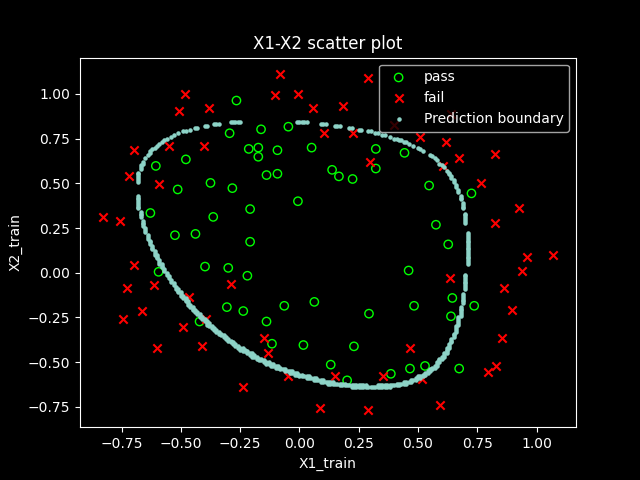

In [4]:
## Logestic Reg 2 : Two features, binary classification, non-linear boundary
##---------------------------------------------------------------------------
# Read and plot training data
X_train, Y_train = read_data('./data/logestic_regression_data_2.txt', feature_count=2)
plot_binary_classification_data(X_train, Y_train)

# Feature mapping
## Data is impossible to divide using a line --> will add polynomial features first
## Here will use a polynomial of degree 6
X_mapped = polynomial_feature_mapper(X_train, 6)
print(X_mapped.shape)

# Find optimal w and b using Gradient Descent
initial_w = np.zeros(X_mapped.shape[1]) # one w for each feature
initial_b = -8.
lambda_reg = 0.01;                                          
iterations = 10000
alpha = 0.01

optimal_w, optimal_b, _ = gradient_descent(X_mapped, Y_train, initial_w, initial_b, alpha, iterations, lambda_reg, log_verbosity=iterations)

# Calculate accuracy of the model
Y_hat = prediction_function(X_mapped, optimal_w, optimal_b, activation=sigmoid)
accuracy = model_accuracy(Y_train, Y_hat)
print(f'Model accuracy: {accuracy}')

# Plot the prediction boundary points
# All X1, X2 pairs when P=0.5
X1 = np.arange(-1,1.25,0.01)
X2 = np.arange(-1,1.25,0.01)
X_meshed = np.array(np.meshgrid(X1, X2)).T.reshape(-1, 2)

X_mapped = polynomial_feature_mapper(X_meshed, 6)
Y_hat = prediction_function(X_mapped, optimal_w, optimal_b, activation=sigmoid)
X_divide = X_mapped[np.around(Y_hat, decimals=2) == 0.5]
plot_binary_classification_data(X_train, Y_train, boundary=X_divide, scatter_boundary=True)